# Task 1: Image Segmentation Using Thresholding
(20 Marks)
(a) Load a grayscale image and implement the following thresholding methods
to segment the image:
* Binary Thresholding
* Adaptive Thresholding
* Otsu’s Thresholding 
(10 Marks)<br>

(b) Display the original and segmented images side by side for comparison,
ensuring each method is clearly labeled. (5 Marks) <br>

(c) In 2-3 sentences, discuss which method provided the best segmentation
for your image and why. Consider factors like clarity of object
boundaries and noise levels. (5 Marks)

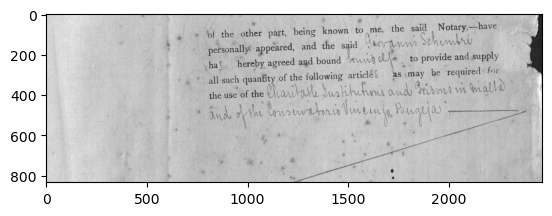

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('../data/hand_image.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')


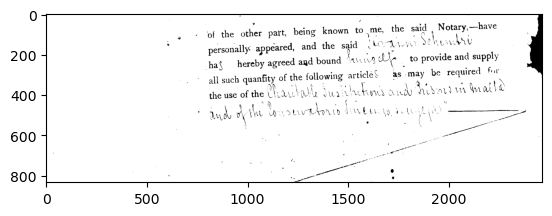

In [2]:
# Binary Thresholding
_, binary_thresh = cv2.threshold(image, 140, 255, cv2.THRESH_BINARY)
plt.imshow(binary_thresh, cmap='gray')

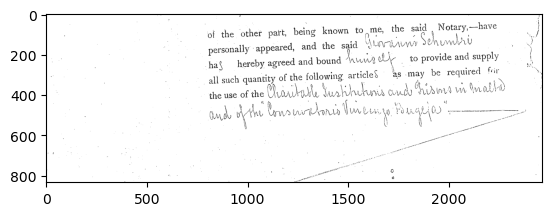

In [3]:
# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 19)
plt.imshow(adaptive_thresh, cmap='gray')

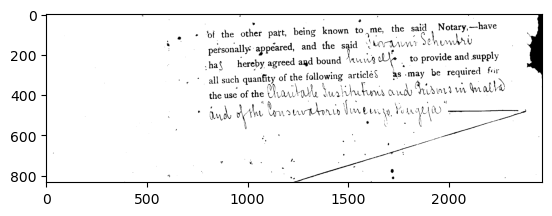

In [4]:
# Otsu's Thresholding
_, otsu_thresh = cv2.threshold(
    image, 130, 255, cv2.THRESH_OTSU)
plt.imshow(otsu_thresh, cmap='gray')

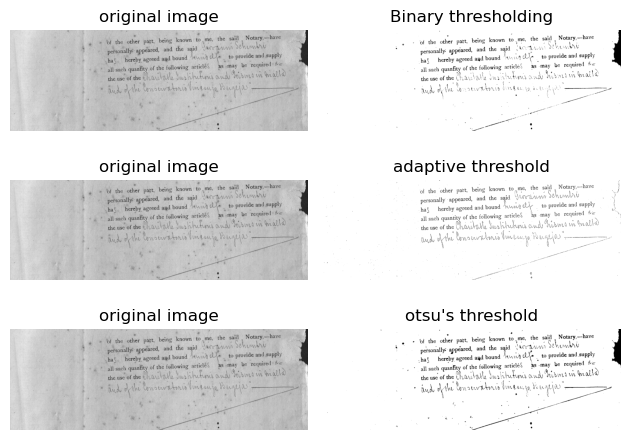

In [5]:
plt.figure()

plt.subplot(3,2,1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(3,2,2)
plt.imshow(binary_thresh, cmap='gray')
plt.axis('off')
plt.title('Binary thresholding')

plt.subplot(3,2,3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('original image')


plt.subplot(3,2,4)
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')
plt.title('adaptive threshold')

plt.subplot(3,2,5)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(3,2,6)
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')
plt.title("otsu's threshold")

plt.tight_layout()
plt.show()

**Observation: (c)**<br>
* Binary thresholding is effective for images with high contrast but struggles with noise and uneven lighting, leading to poor segmentation in noisy images. 
* Adaptive thresholding performs better in unevenly lit or noisy images as it calculates thresholds locally, preserving finer details.
* Otsu’s thresholding optimizes the global threshold value by maximizing inter-class variance but is less effective with high noise. 
* For the given image with full of noise and also containing both printed and handwritten text , adaptive thresholding provides the best segmentation as it handles variations in intensity across the image, producing clearer object boundaries despite noise as can be seen from the results above. 

# Task 2: Line Detection Using Hough Transform
(20 Marks)
(a) Write a function to detect and highlight straight lines in an image
using the Hough Line Transform. Make sure to use the Canny edge
detector to preprocess the image before applying the Hough Transform.
(10 Marks)
(b) Test your function on an image with clear straight lines, such as a
road, building, or grid structure. Display the original image and the
processed image with highlighted lines. (5 Marks)
(c) Experiment with different threshold parameters in the Hough Transform
to optimize line detection. In 2-3 sentences, describe the parameter
changes and how they affected the results. (5 Marks)

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_highlight_lines(image_path, aperture_size=3, canny_threshold1=50, canny_threshold2=150, hough_threshold=100):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (11,11), 0)
    
    edges = cv2.Canny(blurred, canny_threshold1, canny_threshold2, apertureSize=aperture_size)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, hough_threshold)
    
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
    
    plt.figure(figsize=(10, 10))

    plt.subplot(1,3,1)
    plt.title('original image')
    plt.imshow(gray, cmap='gray')
    plt.axis('off')

    
    plt.subplot(1, 3, 2)
    plt.title("Edges Detected (Canny)")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Lines Detected (Hough Transform)")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


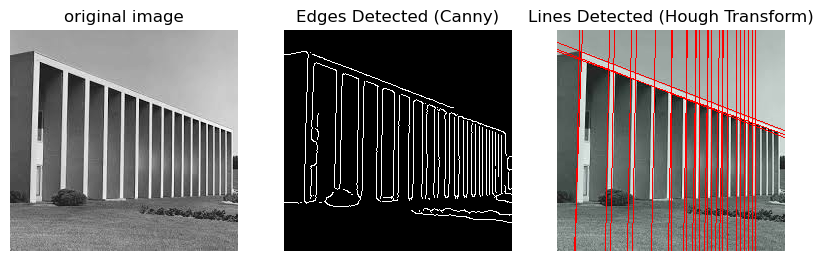

In [7]:
detect_and_highlight_lines('../data/building.jpg', aperture_size=3, canny_threshold1=30, canny_threshold2=50, hough_threshold=70)

**Observation (c)**<br>
* As Hough threshold decreases more lines are detected. 
* As canny edge threshold increases less lines are detected. 
* As aperture size increases the function becomes sensitive to noise.
* As Rho increases the function becomes sensitive to edges and lots of lines are detected. 
* Theta is taken at 1 degree for smooth lines. 


# Task 3: Circle Detection Using Hough Circle Transform (20 Marks)
(a) Implement a function to detect circles in an image using the Hough
Circle Transform. Use suitable preprocessing steps (e.g., smoothing)
to improve detection accuracy. (10 Marks)<br>
(b) Apply your function to an image with circular objects (e.g., coins,
wheels, or round signs). Display the original image and the processed
image with detected circles overlaid. (5 Marks)<br>
(c) Experiment with different radius ranges and accumulator thresholds.
Display the results with and without these adjustments, and briefly
explain any improvements observed. (5 Marks)

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_highlight_circles(image_path, 
                                 blur_ksize=(5, 5), 
                                 dp=1.2, 
                                 min_dist=20, 
                                 param1=50, 
                                 param2=30, 
                                 min_radius=0, 
                                 max_radius=0):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, blur_ksize, 0)

    circles = cv2.HoughCircles(blurred, 
                               cv2.HOUGH_GRADIENT, 
                               dp, 
                               min_dist, 
                               param1=param1, 
                               param2=param2, 
                               minRadius=min_radius, 
                               maxRadius=max_radius)

    output = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  
            radius = circle[2]              
            cv2.circle(output, center, radius, (0, 255, 0), 2)
            cv2.circle(output, center, 2, (0, 0, 255), 3)

    return image, output



In [9]:
def visualize_circle_detection(image_path, **kwargs):
    original, processed = detect_and_highlight_circles(image_path, **kwargs)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Circles Detected")
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()



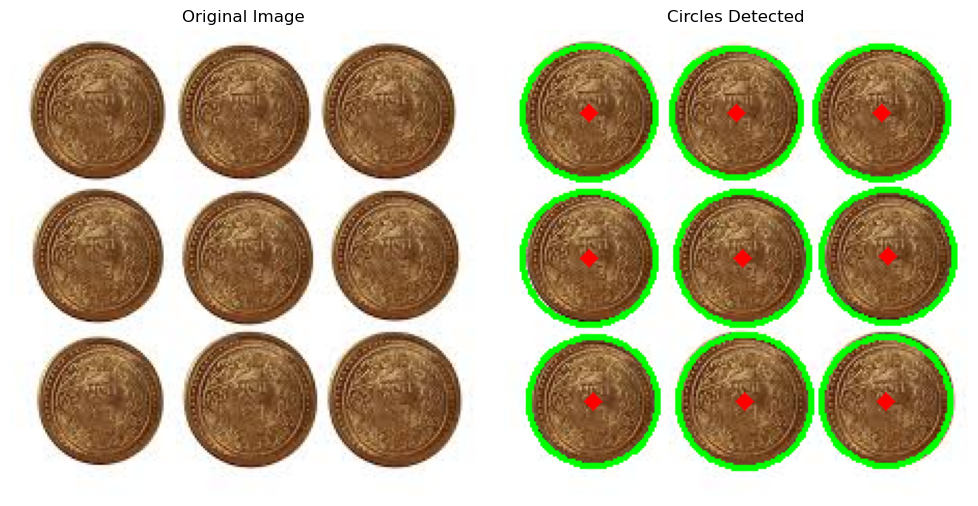

In [10]:
#correct detection parameters
visualize_circle_detection('../data/coins.jpg', dp=1.2, param2=30, min_radius=30, max_radius=50)


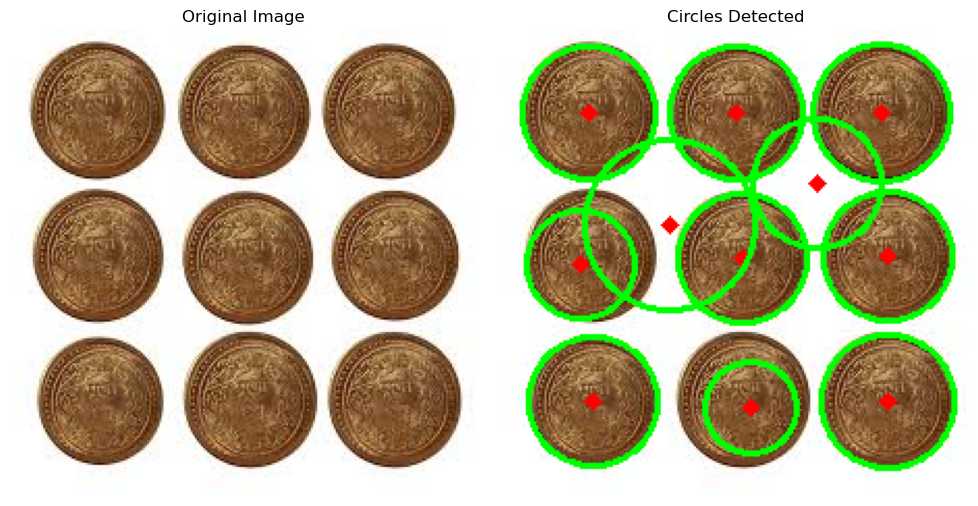

In [11]:
#experimenting with Radius Range
'''
Narrowing the range improves detection of circles with known sizes while ignoring noise.
So if the min radius is small a lot of circles are detected as can be seen below'''
visualize_circle_detection('../data/coins.jpg', dp=1.5, param2=50, min_radius=10, max_radius=45)


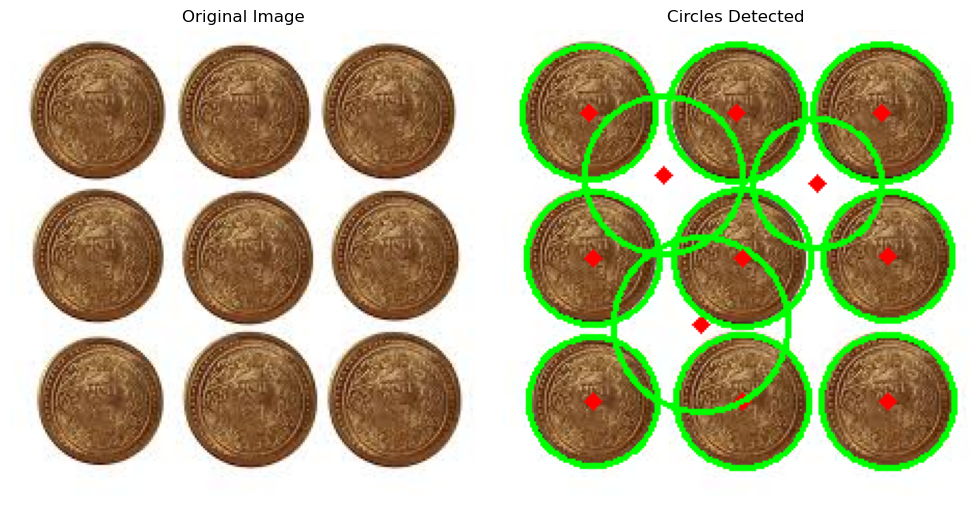

In [12]:
#experimenting with accumulator threshold 
'''
Accumulator Threshold (param2):
Increasing param2 makes detection stricter, reducing false positives.
Decreasing it makes detection lenient, detecting fainter circles.'''
visualize_circle_detection('../data/coins.jpg', dp=1.5, param2=30, min_radius=30, max_radius=45)


# Task 4: Harris Corner Detection (20 Marks)
(a) Create a function to detect and mark corners in an image using the
Harris Corner Detection method. Use an appropriate method to
mark the detected corners on the original image. (10 Marks)<br>
(b) Apply your function to an image with distinct corners, such as a chessboard
or a building with strong edges and corners. Display the original
and processed images with corners marked. (5 Marks)<br>
(c) Vary the sensitivity parameter (typically called k) in the Harris Corner
Detection function. Observe how it affects corner detection, showing
both original and altered results. Briefly explain your findings in 2-3
sentences. (5 Marks)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_harris_corners(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)  

    dst = cv2.cornerHarris(gray, blockSize=block_size, ksize=ksize, k=k)

    dst = cv2.dilate(dst, None)

    corners_marked = image.copy()
    corners_marked[dst > threshold * dst.max()] = [255, 255, 255]  # Mark corners in red

    return image, corners_marked


In [14]:
def visualize_harris_detection(image_path, **kwargs):
    original, corners_marked = detect_harris_corners(image_path, **kwargs)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Corners Detected")
    plt.imshow(cv2.cvtColor(corners_marked, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()



In [15]:
def compare_sensitivity(image_path, k_values, **kwargs):
    plt.figure(figsize=(15, 5))
    
    for i, k in enumerate(k_values):
        _, corners_marked = detect_harris_corners(image_path, k=k, **kwargs)
        plt.subplot(1, len(k_values), i + 1)
        plt.title(f"k = {k}")
        plt.imshow(cv2.cvtColor(corners_marked, cv2.COLOR_BGR2RGB))
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()



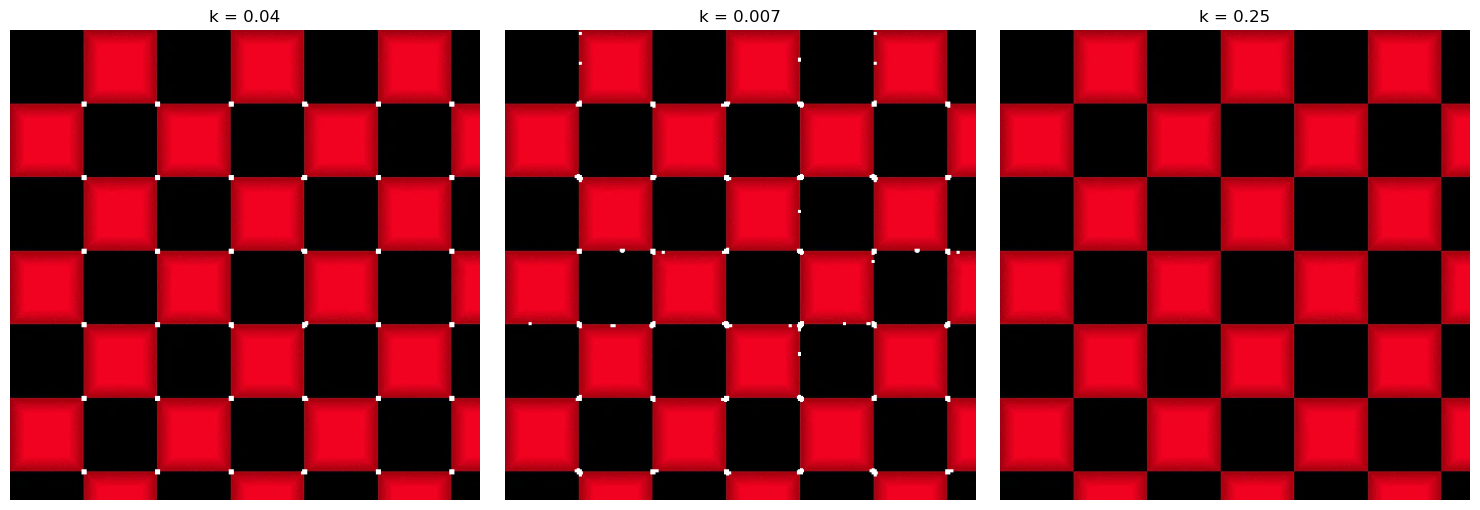

In [16]:
# Sensitivity comparison
compare_sensitivity('../data/ck3.png', k_values=[0.04, 0.007, 0.25], block_size=2, ksize=3, threshold=0.001)


**Observation**<br>
* The k parameter controls the sensitivity of the Harris Corner Detection algorithm.
* In my case the white dots represent the detected corners. As you can see from above decreasing the k value is increasing the sensitivity hence there are a lot of false positives and edges are starting to be detected. Whereas increasing the k value emphasizes more on strong corners hence in the first image the corners are correctly detected. When the k value is increased more than necessary no corners are detected hence showing that increase in k decreases the sensitivity in the above case. 


# Task 5: Short Theory (10 Marks)
In 100-150 words, explain how the Hough Transform differs when detecting
lines versus circles in an image. Discuss how parameter space and computational
complexity vary between these applications. (10 Marks)

**Solution**<br>
* The Hough Transform detects geometric shapes by mapping image points to a parameter space. For line detection, each point in the image maps to a sinusoidal curve in polar coordinates (𝜌,𝜃), where 𝜌 is the distance from the origin, and θ is the angle. Intersections in parameter space correspond to lines. The parameter space is 2D, this makes it computationally efficient. 
* For circle detection, each point maps to a 3D parameter space (x,y,r), representing the center coordinates (x,y) and radius r of the circle. This increases computational complexity, as three parameters must be searched. Moreover, circles of unknown radii require multiple iterations, which adds to the computational cost. 